Create a train dataset

In [5]:
import matplotlib.pyplot as plt
from schnapsen.bots import RdeepBot, AlphaBetaBot
from schnapsen.game import (SchnapsenGamePlayEngine, GameState, BotState, SchnapsenDeckGenerator, 
                            SchnapsenHandGenerator, Bot, Score)
from schnapsen.game import Talon, Suit
from nn_bot import NNDataBot, NNPlayingBot, train_NN_model, create_replay_memory_dataset, train_model, play_games_and_return_stats
import random
import pathlib 

bot1 = RdeepBot(5, 5, random.Random(40), "Rdeepbot_1")
bot2 = RdeepBot(10, 10, random.Random(40), "RdeepBot_2")
#create_replay_memory_dataset(bot1=bot1, bot2=bot2)


Train different models

In [14]:
for numberOfLayers in range(1,11):
    number_of_hidden_layers = (10, ) * numberOfLayers
    train_model(number_of_hidden_layers)

Model at NN_models\NN_model_10 exists already and will be overwritten as selected.
Dataset Statistics:
Samples of wins: 7458
Samples of losses: 7458
Training a Complex (Neural Network) model.
Starting training phase...
Iteration 1, loss = 0.74781925
Validation score: 0.473190
Iteration 2, loss = 0.71358013
Validation score: 0.505362
Iteration 3, loss = 0.69493290
Validation score: 0.548928
Iteration 4, loss = 0.68453221
Validation score: 0.569705
Iteration 5, loss = 0.67767115
Validation score: 0.593834
Iteration 6, loss = 0.67284336
Validation score: 0.605228
Iteration 7, loss = 0.66929506
Validation score: 0.605898
Iteration 8, loss = 0.66653841
Validation score: 0.604558
Iteration 9, loss = 0.66437792
Validation score: 0.605228
Iteration 10, loss = 0.66263297
Validation score: 0.613271
Iteration 11, loss = 0.66117702
Validation score: 0.615952
Iteration 12, loss = 0.65985272
Validation score: 0.612601
Iteration 13, loss = 0.65868688
Validation score: 0.615282
Iteration 14, loss = 0.

Creare tree bots with different number of layers

In [16]:
path  = "NN_model"
bots = []
for numberOfLayers in range(1,11):
    model_location = pathlib.Path("NN_models") / ("NN_model" + "_10" * numberOfLayers)
    bots.append(NNPlayingBot(model_location=model_location, name = "MLPlayingBot_" + str(numberOfLayers)))

Play 1000 games for each bot agains alphabeta bot

Winrate of MLPlayingBot_1 is 0.029
Winrate of MLPlayingBot_2 is 0.038
Winrate of MLPlayingBot_3 is 0.031
Winrate of MLPlayingBot_4 is 0.034
Winrate of MLPlayingBot_5 is 0.038
Winrate of MLPlayingBot_6 is 0.033
Winrate of MLPlayingBot_7 is 0.041
Winrate of MLPlayingBot_8 is 0.032
Winrate of MLPlayingBot_9 is 0.04
Winrate of MLPlayingBot_10 is 0.031
[(1, 0.029), (2, 0.038), (3, 0.031), (4, 0.034), (5, 0.038), (6, 0.033), (7, 0.041), (8, 0.032), (9, 0.04), (0, 0.031)]


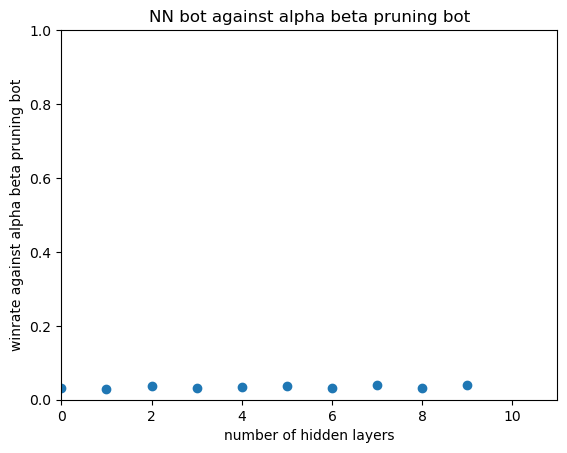

In [21]:
alphabeta_bot = AlphaBetaBot("Alpha-Beta_bot")
data = []
for bot in bots:
    data.append((int(bot._Bot__name[-1]), play_games_and_return_stats(bot, alphabeta_bot, 100)))
    print(f"Winrate of {bot._Bot__name} is {data[-1][1]}")
print(data)
x, y = zip(*data)
plt.scatter(x, y)
plt.xlabel('number of hidden layers')
plt.ylabel('winrate against alpha beta pruning bot')
plt.title('NN bot against alpha beta pruning bot')
plt.xlim(0, 11)
plt.ylim(0, 1)
plt.show()
